In [1]:
import numpy as np
import pandas as pd

import matplotlib as matplotlib
import matplotlib.pyplot as plt
import scienceplots

SMALL_SIZE = 16
FONT = {'color':  'black',
        'weight': 'normal',
        'size': SMALL_SIZE
       }

plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.style.use(['science','no-latex'])

In [2]:
# Notebooks paths
H_DELTA_ZERO = './results/heston_delta_zero.csv'
H_DELTA_LOW = './results/heston_delta_low.csv'
H_DELTA_HIGH = './results/heston_delta_high.csv'

WILMOTT_DELTA_ZERO = './results/heston_delta_w_zero.csv'
WILMOTT_DELTA_LOW = './results/heston_delta_w_low.csv'
WILMOTT_DELTA_HIGH = './results/heston_delta_w_high.csv'

TD3_DELTA_ZERO = './results/td3-heston-zero_res.csv'
TD3_DELTA_LOW = './results/td3-heston-low_res.csv'
TD3_DELTA_HIGH = './results/td3-heston-high_res.csv'

In [3]:
df_h_zero = pd.read_csv(H_DELTA_ZERO, index_col=0)
df_h_low = pd.read_csv(H_DELTA_LOW, index_col=0)
df_h_high = pd.read_csv(H_DELTA_HIGH, index_col=0)
df_h_zero = df_h_zero.drop(columns=['Sigma'])
df_h_low = df_h_low.drop(columns=['Sigma'])
df_h_high = df_h_high.drop(columns=['Sigma'])

df_wilmott_zero = pd.read_csv(WILMOTT_DELTA_ZERO, index_col=0)
df_wilmott_low = pd.read_csv(WILMOTT_DELTA_LOW, index_col=0)
df_wilmott_high = pd.read_csv(WILMOTT_DELTA_HIGH, index_col=0)
df_wilmott_zero = df_wilmott_zero.drop(columns=['Sigma'])
df_wilmott_low = df_wilmott_low.drop(columns=['Sigma'])
df_wilmott_high = df_wilmott_high.drop(columns=['Sigma'])

df_td3_zero = pd.read_csv(TD3_DELTA_ZERO, index_col=0)
df_td3_low = pd.read_csv(TD3_DELTA_LOW, index_col=0)
df_td3_high = pd.read_csv(TD3_DELTA_HIGH, index_col=0)

In [4]:
# Rename the columns
df_h_zero = df_h_zero.rename(columns={'E_PL_T': 'E_PL_T_h', 'Std_PL_T': 'Std_PL_T_h'})
df_wilmott_zero = df_wilmott_zero.rename(columns={'E_PL_T': 'E_PL_T_wilmott', 'Std_PL_T': 'Std_PL_T_wilmott'})
df_td3_zero = df_td3_zero.rename(columns={'E_PL_T': 'E_PL_T_td3', 'Std_PL_T': 'Std_PL_T_td3'})

df_h_low = df_h_low.rename(columns={'E_PL_T': 'E_PL_T_h', 'Std_PL_T': 'Std_PL_T_h'})
df_wilmott_low = df_wilmott_low.rename(columns={'E_PL_T': 'E_PL_T_wilmott', 'Std_PL_T': 'Std_PL_T_wilmott'})
df_td3_low = df_td3_low.rename(columns={'E_PL_T': 'E_PL_T_td3', 'Std_PL_T': 'Std_PL_T_td3'})

df_h_high = df_h_high.rename(columns={'E_PL_T': 'E_PL_T_h', 'Std_PL_T': 'Std_PL_T_h'})
df_wilmott_high = df_wilmott_high.rename(columns={'E_PL_T': 'E_PL_T_wilmott', 'Std_PL_T': 'Std_PL_T_wilmott'})
df_td3_high = df_td3_high.rename(columns={'E_PL_T': 'E_PL_T_td3', 'Std_PL_T': 'Std_PL_T_td3'})

keys = ['Strike', 'Maturity', 'Rebalancing_freq']

## Zero transaction resutls

In [5]:
df_zero = pd.merge(df_h_zero, df_wilmott_zero, how='right', on=keys).merge(df_td3_zero, how='right', on=keys)
df_zero = df_zero.drop(columns=['E_PL_T_wilmott', 'Std_PL_T_wilmott'])
df_zero

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_td3,Std_PL_T_td3
0,100,1.0,252,0.004384,0.106929,0.065226,0.446920
1,100,1.0,52,0.000566,0.154870,-0.010150,0.445987
2,80,1.0,252,0.001294,0.014856,-0.019051,0.178283
3,80,1.0,52,-0.006902,0.034361,0.011276,0.170814
4,90,1.0,252,0.004341,0.041265,0.013976,0.271160
5,90,1.0,52,0.002334,0.064147,-0.032466,0.285204
6,110,1.0,252,-0.004449,0.182429,-0.047459,0.616938
7,110,1.0,52,-0.013897,0.258091,0.084988,0.674150
8,120,1.0,252,0.005342,0.337134,0.112966,1.429142
9,120,1.0,52,-0.009566,0.553972,0.247739,1.554989


### Different strikes, daily rebalancing

In [6]:
df_zero[(df_zero['Rebalancing_freq'] == 252)]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_td3,Std_PL_T_td3
0,100,1.0,252,0.004384,0.106929,0.065226,0.446920
2,80,1.0,252,0.001294,0.014856,-0.019051,0.178283
4,90,1.0,252,0.004341,0.041265,0.013976,0.271160
6,110,1.0,252,-0.004449,0.182429,-0.047459,0.616938
8,120,1.0,252,0.005342,0.337134,0.112966,1.429142


In [7]:
res_1 = df_zero[(df_zero['Rebalancing_freq'] == 252) & (df_zero['Strike'] == 100)]
res_2 = df_zero[(df_zero['Rebalancing_freq'] == 52) & (df_zero['Strike'] == 100)]

In [8]:
x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

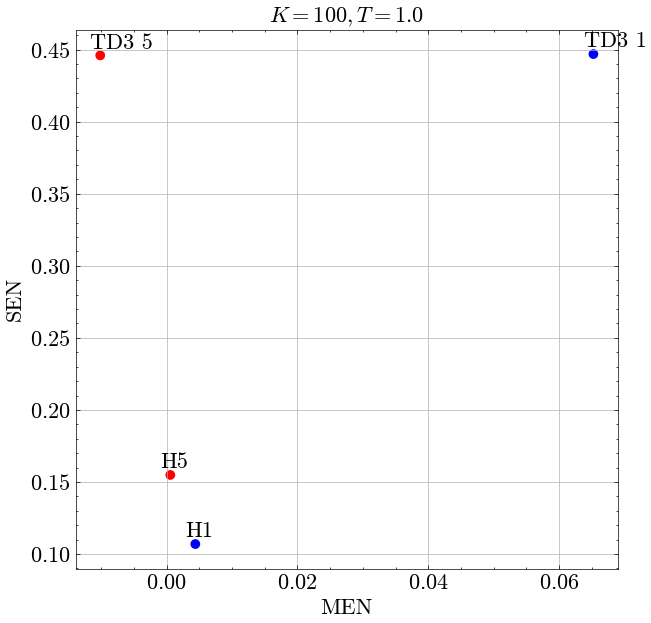

In [9]:
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'red', 'red'])
text_labels = ['H1', 'TD3 1', 'H5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.title(r'$K = 100, T = 1.0$', fontdict=FONT)
plt.grid()
plt.show()

### Different strikes, weekly rebalancing

In [10]:
df_zero[(df_zero['Rebalancing_freq'] == 52)]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_td3,Std_PL_T_td3
1,100,1.0,52,0.000566,0.154870,-0.010150,0.445987
3,80,1.0,52,-0.006902,0.034361,0.011276,0.170814
5,90,1.0,52,0.002334,0.064147,-0.032466,0.285204
7,110,1.0,52,-0.013897,0.258091,0.084988,0.674150
9,120,1.0,52,-0.009566,0.553972,0.247739,1.554989


### Different maturities, daily rebalancing

In [11]:
df_zero[(df_zero['Rebalancing_freq'].isin([504, 121, 50]))]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_td3,Std_PL_T_td3
10,100,2.0,504,-0.008879,0.194404,0.018491,0.599034
12,100,0.5,121,-0.008513,0.092046,0.041150,0.404336
14,100,0.2,50,0.001954,0.146071,-0.062772,0.457509


### Different maturities, weekly rebalancing

In [12]:
df_zero[(df_zero['Rebalancing_freq'].isin([104, 26, 10]))]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_td3,Std_PL_T_td3
11,100,2.0,104,-0.009728,0.223515,-0.049928,0.694947
13,100,0.5,26,-0.041701,0.194830,-0.078866,0.560901
15,100,0.2,10,0.021692,0.214971,0.035762,0.582289


## Low transaction results

In [13]:
df_low = pd.merge(df_h_low, df_wilmott_low, how='right', on=keys).merge(df_td3_low, how='right', on=keys)
df_low

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,1.0,252,-0.634802,0.281530,-0.563465,0.329028,0.370024,0.361860
1,100,1.0,52,-0.282317,0.152294,-0.033488,0.651733,0.249775,0.421411
2,80,1.0,252,-0.124420,0.084861,-0.092207,0.079711,0.080246,0.164270
3,80,1.0,52,-0.059318,0.057211,-0.004860,0.116378,0.046347,0.164804
4,90,1.0,252,-0.279050,0.149936,-0.258495,0.185978,0.185777,0.210566
5,90,1.0,52,-0.148647,0.093568,-0.048296,0.314792,0.082633,0.250362
6,110,1.0,252,-1.177549,0.618010,-1.006284,0.498726,1.058630,0.906466
7,110,1.0,52,-0.526841,0.341823,-0.263971,1.177315,0.405238,0.911268
8,120,1.0,252,-1.849615,1.347448,-1.854558,1.428657,2.404537,2.644273
9,120,1.0,52,-0.874253,0.847884,-0.540745,2.627497,1.037715,2.418981


### Different strikes

#### daily rebalancing

In [14]:
df_low[(df_low['Rebalancing_freq'] == 252)]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,1.0,252,-0.634802,0.281530,-0.563465,0.329028,0.370024,0.361860
2,80,1.0,252,-0.124420,0.084861,-0.092207,0.079711,0.080246,0.164270
4,90,1.0,252,-0.279050,0.149936,-0.258495,0.185978,0.185777,0.210566
6,110,1.0,252,-1.177549,0.618010,-1.006284,0.498726,1.058630,0.906466
8,120,1.0,252,-1.849615,1.347448,-1.854558,1.428657,2.404537,2.644273


#### weekly rebalancing

In [15]:
df_low[(df_low['Rebalancing_freq'] == 52)]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
1,100,1.0,52,-0.282317,0.152294,-0.033488,0.651733,0.249775,0.421411
3,80,1.0,52,-0.059318,0.057211,-0.004860,0.116378,0.046347,0.164804
5,90,1.0,52,-0.148647,0.093568,-0.048296,0.314792,0.082633,0.250362
7,110,1.0,52,-0.526841,0.341823,-0.263971,1.177315,0.405238,0.911268
9,120,1.0,52,-0.874253,0.847884,-0.540745,2.627497,1.037715,2.418981


#### Visualizations

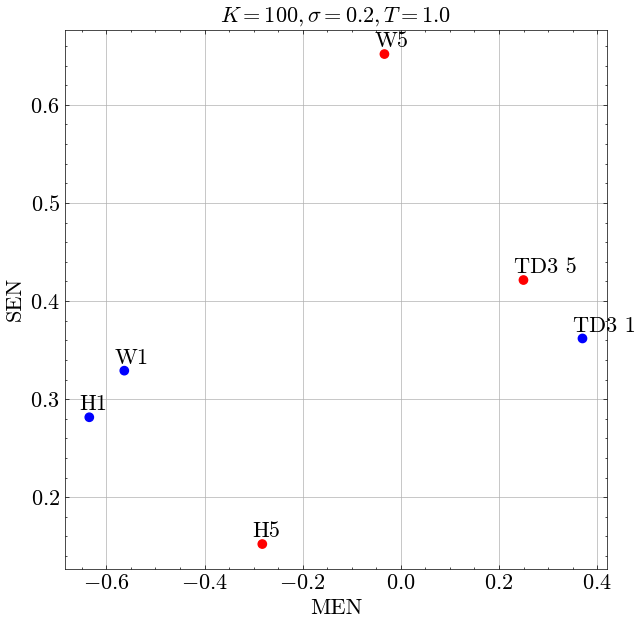

In [16]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

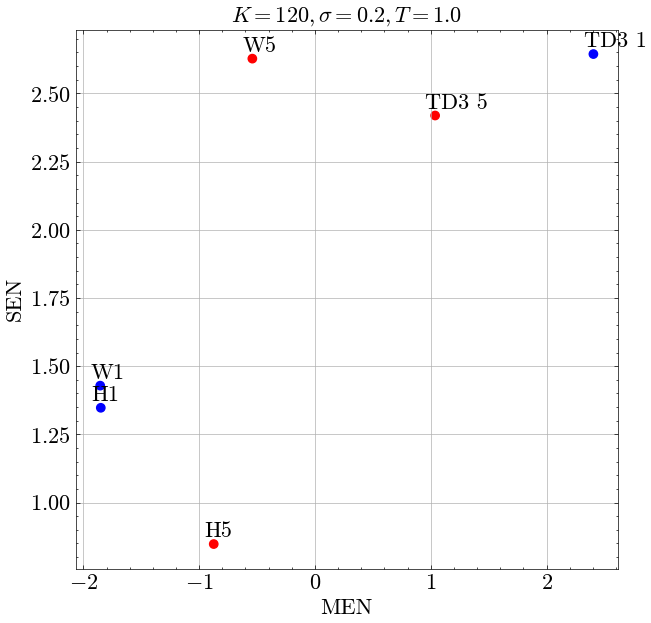

In [17]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Strike'] == 120)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Strike'] == 120)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 120, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

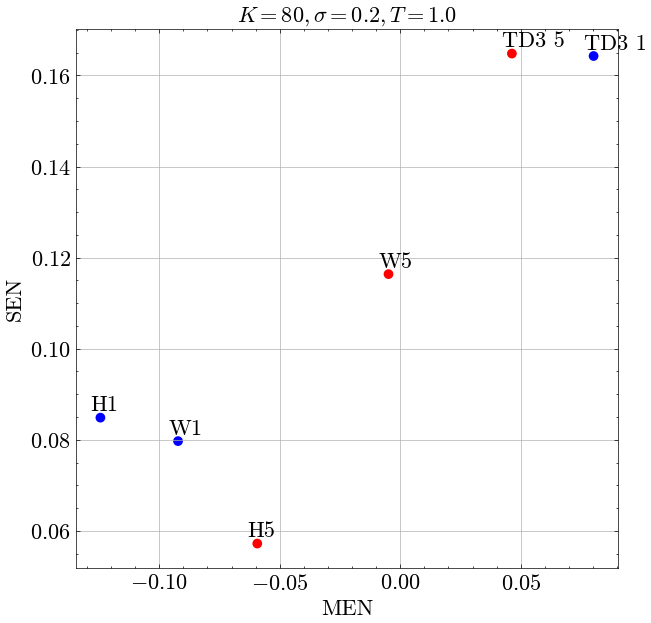

In [18]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Strike'] == 80)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Strike'] == 80)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 80, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

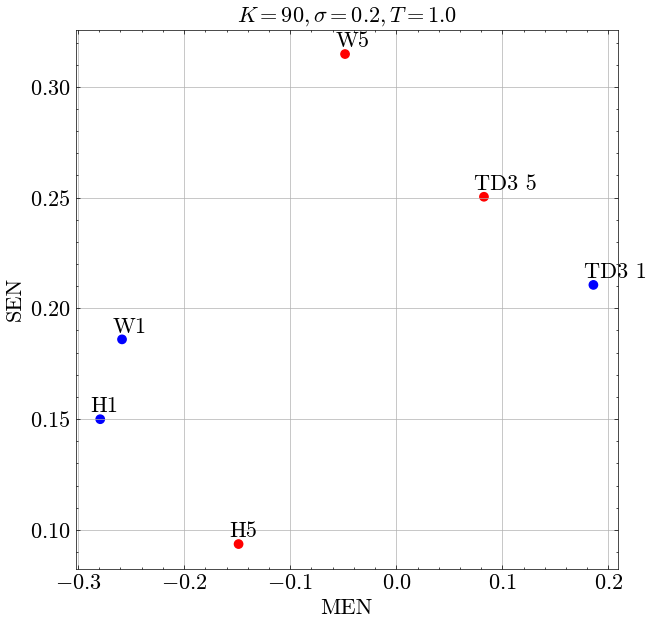

In [19]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Strike'] == 90)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Strike'] == 90)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 90, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

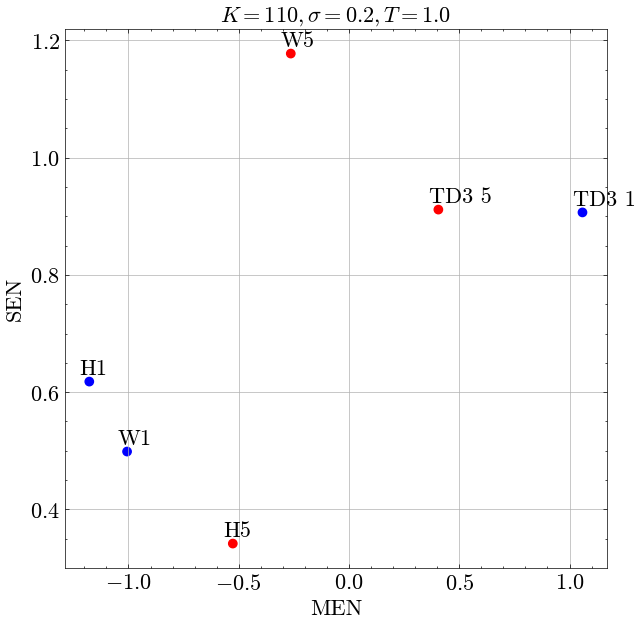

In [20]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 252) & (df_low['Strike'] == 110)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 52) & (df_low['Strike'] == 110)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 110, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

### Different maturities

#### daily rebalancing

In [21]:
df_low[(df_low['Rebalancing_freq'].isin([504, 121, 50]))]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
10,100,2.0,504,-0.591600,0.200152,-0.497018,0.206450,0.699783,0.378225
12,100,0.5,121,-0.614753,0.260367,-0.519507,0.395916,0.308082,0.410838
14,100,0.2,50,-0.649257,0.294646,-0.587168,0.272206,0.219928,0.564473


#### weekly rebalancing

In [22]:
df_low[(df_low['Rebalancing_freq'].isin([104, 26, 10]))]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
11,100,2.0,104,-0.258798,0.226722,-0.074187,0.628791,0.382156,0.388589
13,100,0.5,26,-0.252301,0.204983,-0.221701,0.223342,0.215348,0.468873
15,100,0.2,10,-0.239887,0.380477,-0.206961,0.291468,0.010013,0.587807


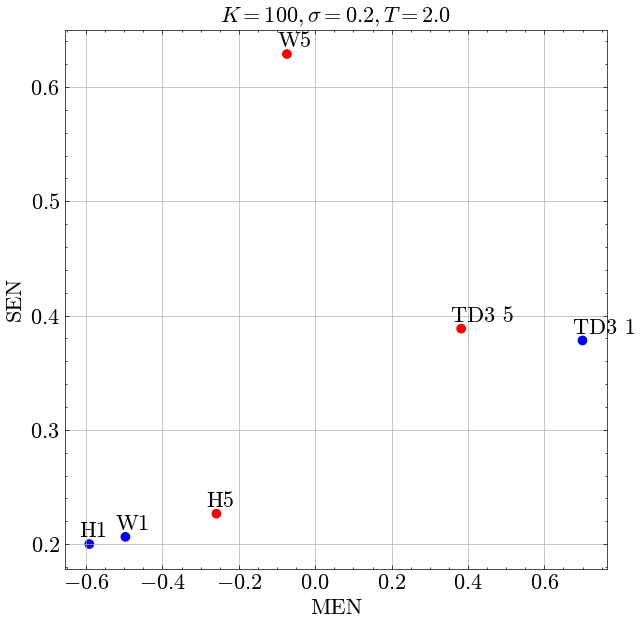

In [23]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 504) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 104) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 2.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

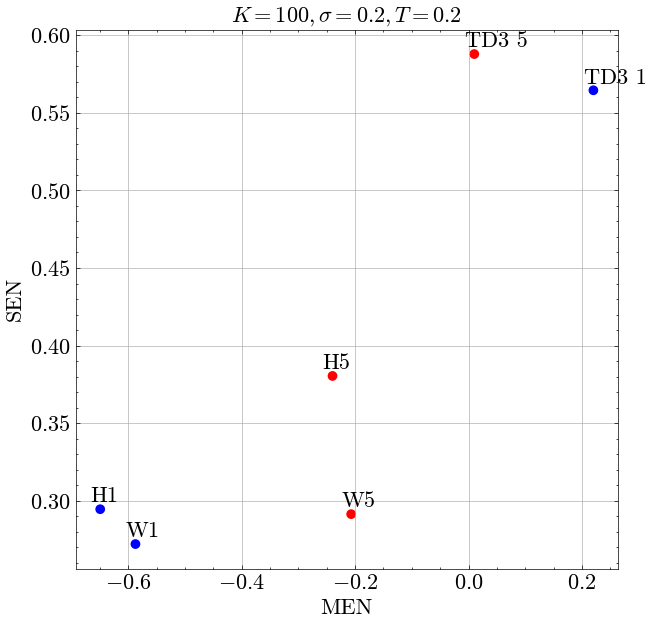

In [24]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 50) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 10) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.2$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

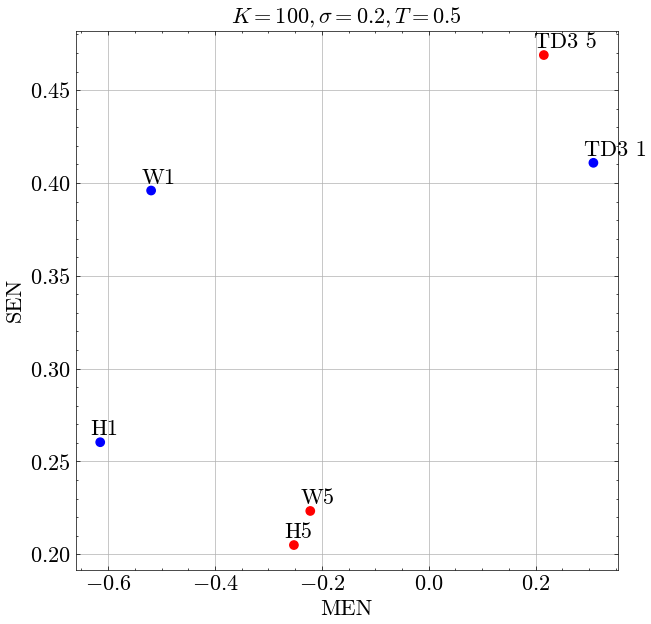

In [25]:
res_1 = df_low[(df_low['Rebalancing_freq'] == 121) & (df_low['Strike'] == 100)]
res_2 = df_low[(df_low['Rebalancing_freq'] == 26) & (df_low['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.5$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

## High transaction resutls

In [26]:
df_high = pd.merge(df_h_high, df_wilmott_high, how='right', on=keys).merge(df_td3_high, how='right', on=keys)
df_high

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,1.0,252,-3.215136,1.337357,-3.270755,1.230993,1.692993,1.462880
1,100,1.0,52,-1.516624,0.565704,-0.864284,0.487440,1.022953,0.954252
2,80,1.0,252,-0.579632,0.384903,-0.582101,0.375750,0.555816,0.653300
3,80,1.0,52,-0.230122,0.183751,-0.167170,0.133564,0.577065,0.894507
4,90,1.0,252,-1.507568,0.635143,-1.454341,0.685617,0.787338,0.773679
5,90,1.0,52,-0.652497,0.281039,-0.422688,0.211000,0.497242,0.838073
6,110,1.0,252,-6.528004,2.660570,-5.865923,2.849841,3.387066,1.950802
7,110,1.0,52,-2.783176,1.253833,-1.653257,1.025510,1.922394,1.689175
8,120,1.0,252,-11.183373,7.879727,-10.406663,6.986888,8.152615,7.251771
9,120,1.0,52,-5.069592,3.627431,-3.701485,2.829933,3.640450,2.969514


### Different strikes

#### daily rebalancing

In [27]:
df_high[(df_high['Rebalancing_freq'] == 252)]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
0,100,1.0,252,-3.215136,1.337357,-3.270755,1.230993,1.692993,1.462880
2,80,1.0,252,-0.579632,0.384903,-0.582101,0.375750,0.555816,0.653300
4,90,1.0,252,-1.507568,0.635143,-1.454341,0.685617,0.787338,0.773679
6,110,1.0,252,-6.528004,2.660570,-5.865923,2.849841,3.387066,1.950802
8,120,1.0,252,-11.183373,7.879727,-10.406663,6.986888,8.152615,7.251771


#### weekly rebalancing

In [28]:
df_high[(df_high['Rebalancing_freq'] == 52)]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
1,100,1.0,52,-1.516624,0.565704,-0.864284,0.487440,1.022953,0.954252
3,80,1.0,52,-0.230122,0.183751,-0.167170,0.133564,0.577065,0.894507
5,90,1.0,52,-0.652497,0.281039,-0.422688,0.211000,0.497242,0.838073
7,110,1.0,52,-2.783176,1.253833,-1.653257,1.025510,1.922394,1.689175
9,120,1.0,52,-5.069592,3.627431,-3.701485,2.829933,3.640450,2.969514


#### Visualizations

In [29]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Strike'] == 100)]

In [30]:
x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

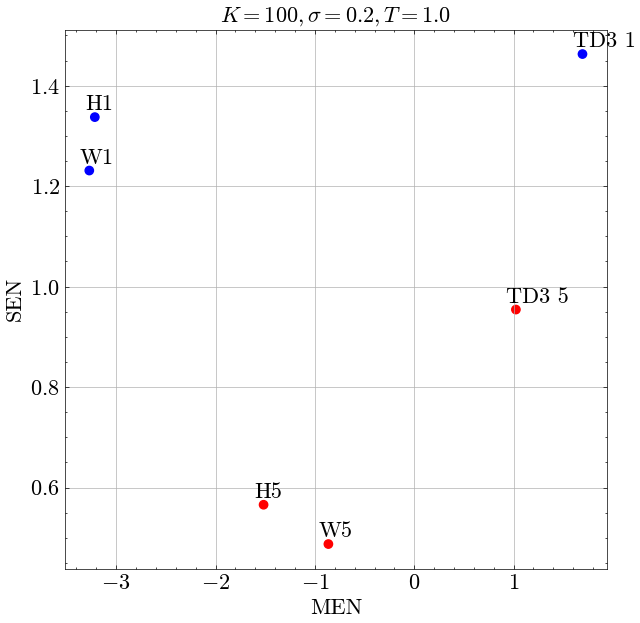

In [31]:
plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

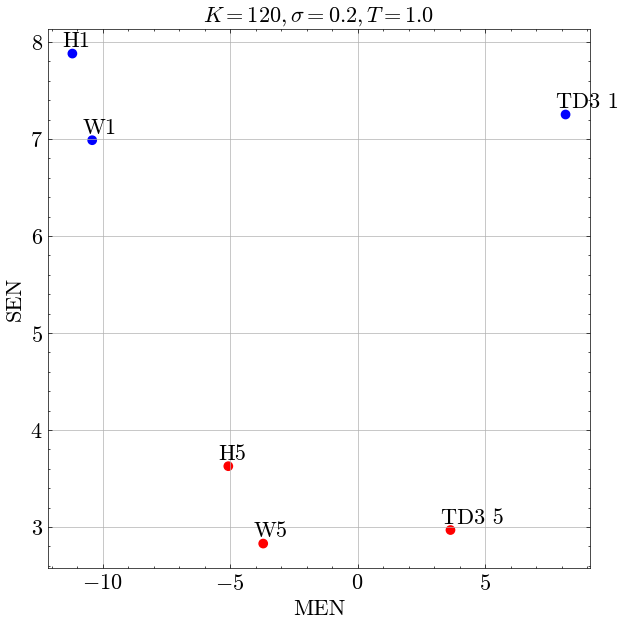

In [32]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Strike'] == 120)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Strike'] == 120)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 120, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

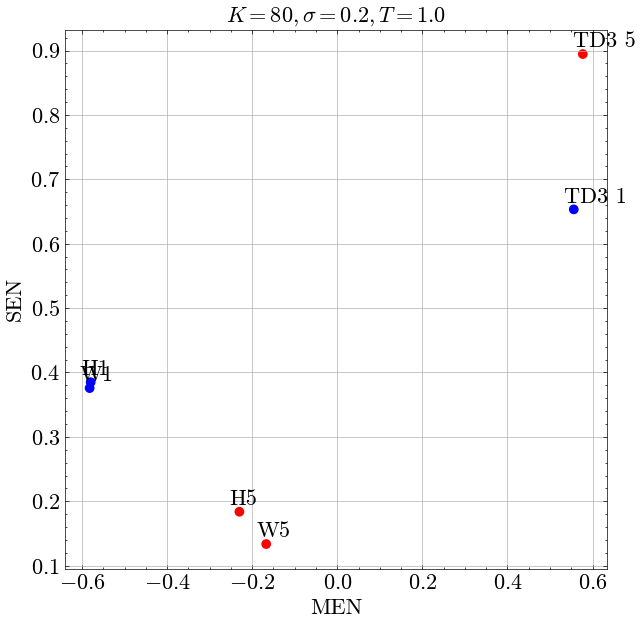

In [33]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Strike'] == 80)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Strike'] == 80)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 80, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

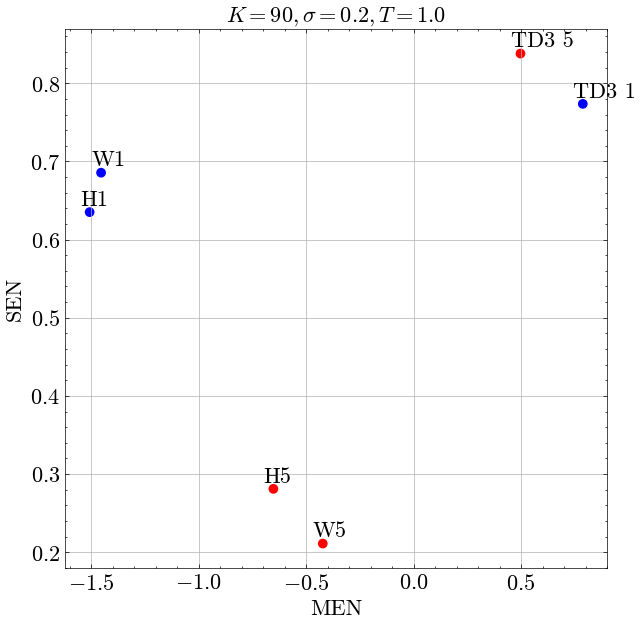

In [34]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Strike'] == 90)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Strike'] == 90)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 90, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

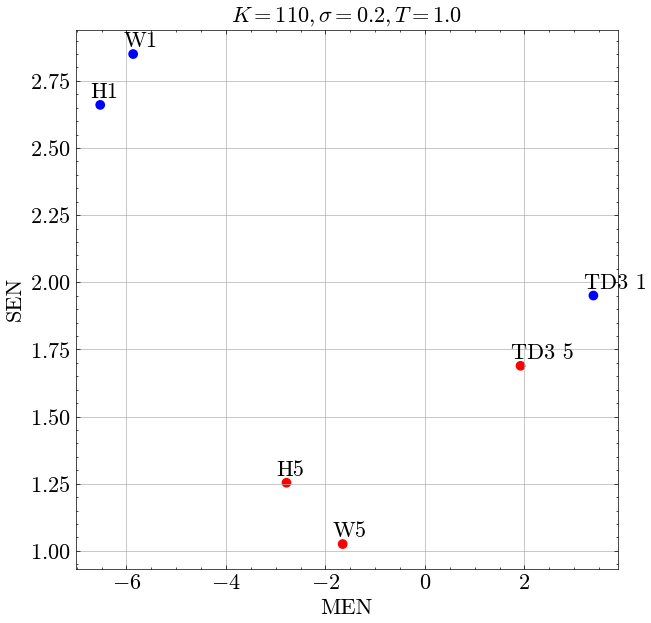

In [35]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 252) & (df_high['Strike'] == 110)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 52) & (df_high['Strike'] == 110)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 110, \sigma = 0.2, T = 1.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

### Different maturities

#### daily rebalancing

In [36]:
df_high[(df_high['Rebalancing_freq'].isin([504, 121, 50]))]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
10,100,2.0,504,-2.894929,0.613439,-2.830395,0.704524,0.740577,1.083104
12,100,0.5,121,-3.336707,1.228389,-3.057891,1.069182,1.662526,2.216568
14,100,0.2,50,-2.950710,1.033977,-3.165019,1.070394,1.272552,0.818704


#### weekly rebalancing

In [37]:
df_high[(df_high['Rebalancing_freq'].isin([104, 26, 10]))]

,Strike,Maturity,Rebalancing_freq,E_PL_T_h,Std_PL_T_h,E_PL_T_wilmott,Std_PL_T_wilmott,E_PL_T_td3,Std_PL_T_td3
11,100,2.0,104,-1.328304,0.309632,-1.023492,0.436253,0.623349,1.130770
13,100,0.5,26,-1.372200,0.533814,-1.295896,0.456793,0.693964,0.715362
15,100,0.2,10,-1.196950,0.597531,-1.160655,0.550458,0.395529,0.602567


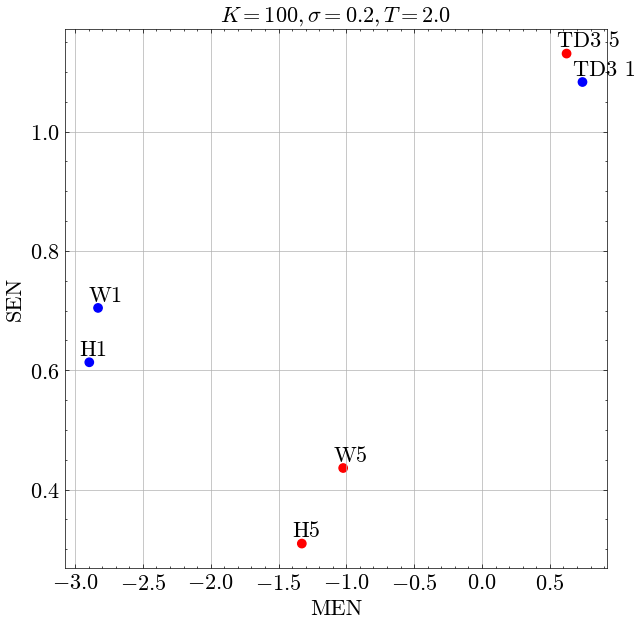

In [38]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 504) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 104) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 2.0$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

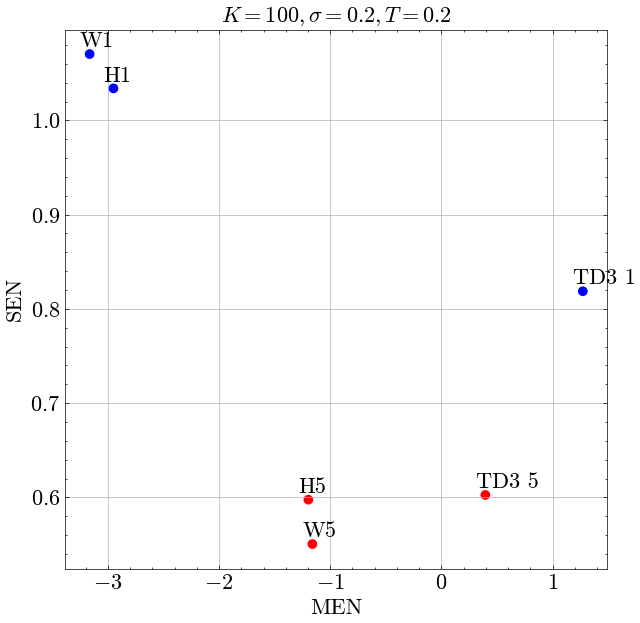

In [39]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 50) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 10) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.2$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()

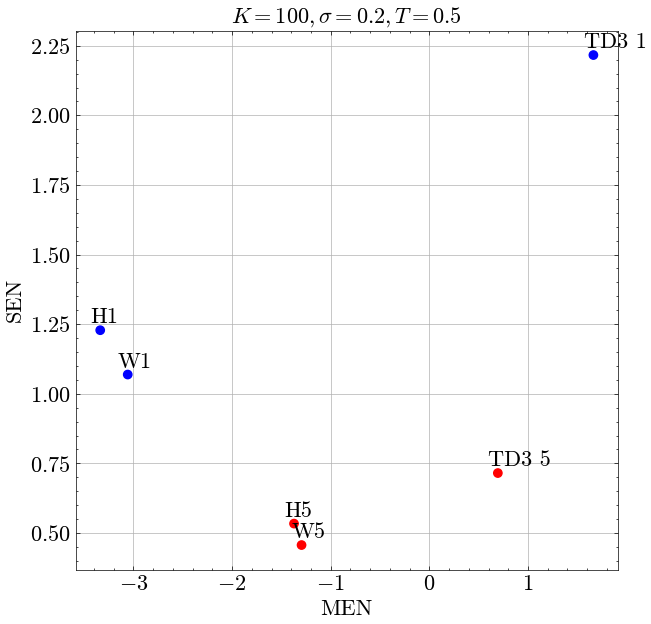

In [40]:
res_1 = df_high[(df_high['Rebalancing_freq'] == 121) & (df_high['Strike'] == 100)]
res_2 = df_high[(df_high['Rebalancing_freq'] == 26) & (df_high['Strike'] == 100)]

x_1 = res_1[[col for col in res_1.columns if col.startswith('E')]].values[0]
y_1 = res_1[[col for col in res_1.columns if col.startswith('Std')]].values[0]
x_2 = res_2[[col for col in res_2.columns if col.startswith('E')]].values[0]
y_2 = res_2[[col for col in res_2.columns if col.startswith('Std')]].values[0]

x = np.concatenate((x_1, x_2))
y = np.concatenate((y_1, y_2))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c=['blue', 'blue', 'blue', 'red', 'red', 'red'])
text_labels = ['H1', 'W1', 'TD3 1', 'H5', 'W5', 'TD3 5']

for i, txt in enumerate(text_labels):
  plt.annotate(txt, (x[i], y[i]), xytext=(-7, 5), textcoords="offset points", size=SMALL_SIZE)

plt.title(r'$K = 100, \sigma = 0.2, T = 0.5$', fontdict=FONT)
plt.xlabel('MEN', fontdict=FONT)
plt.ylabel('SEN', fontdict=FONT)
plt.grid()
plt.show()